# Import Library

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from tqdm import tqdm, tqdm_notebook
import json

import time
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Set up Token

In [2]:
client_id = 'YOUR_CLIENT_ID'
client_secret = 'YOUR_CLIENT_SECRET'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Get User Playlist

In [6]:
df = pd.read_csv('..data/spotify_dataset.csv',error_bad_lines=False,warn_bad_lines=False)
df.head()

,user_id,"""artistname""","""trackname""","""playlistname"""
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


### Rename Columns

In [7]:
df.rename(index=str, columns={
    ' "artistname"': "artist",
    ' "trackname"': "trackname",
    ' "playlistname"': "playlistname"
},inplace=True)
df.head()

,user_id,artist,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


In [8]:
df.shape

(12891680, 4)

## Create User-Playlistname Column

In [9]:
user_df = df.copy()

In [10]:
user_df['user_playlistname'] = user_df['user_id'] + '--' + user_df['playlistname']
user_df

,user_id,artist,trackname,playlistname,user_playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010
...,...,...,...,...,...
12891675,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone,2302bf9c64dc63d88a750215ed187f2c--iPhone
12891676,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone,2302bf9c64dc63d88a750215ed187f2c--iPhone
12891677,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone,2302bf9c64dc63d88a750215ed187f2c--iPhone
12891678,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone,2302bf9c64dc63d88a750215ed187f2c--iPhone


## Get Playlist Size


In [11]:
user_df['playlist_size'] = user_df.groupby('user_playlistname')['user_playlistname'].transform('size')
user_df.head()

,user_id,artist,trackname,playlistname,user_playlistname,playlist_size
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67.0
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67.0
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67.0
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67.0
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67.0


## Get Playlist Position

In [12]:
user_df['playlist_position'] = user_df.groupby('user_playlistname').cumcount(ascending=True)
user_df.head()

,user_id,artist,trackname,playlistname,user_playlistname,playlist_size,playlist_position
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67.0,0
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67.0,1
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67.0,2
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67.0,3
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67.0,4


In [13]:
user_df.tail()

,user_id,artist,trackname,playlistname,user_playlistname,playlist_size,playlist_position
12891675,2302bf9c64dc63d88a750215ed187f2c,Mötley Crüe,Wild Side,iPhone,2302bf9c64dc63d88a750215ed187f2c--iPhone,114.0,109
12891676,2302bf9c64dc63d88a750215ed187f2c,John Lennon,Woman,iPhone,2302bf9c64dc63d88a750215ed187f2c--iPhone,114.0,110
12891677,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Don't Know How It Feels,iPhone,2302bf9c64dc63d88a750215ed187f2c--iPhone,114.0,111
12891678,2302bf9c64dc63d88a750215ed187f2c,Tom Petty,You Wreck Me,iPhone,2302bf9c64dc63d88a750215ed187f2c--iPhone,114.0,112
12891679,2302bf9c64dc63d88a750215ed187f2c,Skid Row,Youth Gone Wild,iPhone,2302bf9c64dc63d88a750215ed187f2c--iPhone,114.0,113


In [14]:
user_df['user_playlistname'].nunique()

231804

## Only select playlists that have more than 10 and 50 songs

In [15]:
user_df = user_df[user_df.playlist_size >= 10]
user_df = user_df[user_df.playlist_size <= 50]
user_df['user_playlistname'].nunique()

143388

## Take care of N/As

In [16]:
user_df['playlist_null_count'] = user_df.groupby('user_playlistname')['artist'].transform(lambda group: group.isnull().sum())
user_df

,user_id,artist,trackname,playlistname,user_playlistname,playlist_size,playlist_position,playlist_null_count
67,9cc0cfd4d7d7885102480dd99e7a90d6,Noah And The Whale,5 Years Time,IOW 2012,9cc0cfd4d7d7885102480dd99e7a90d6--IOW 2012,37.0,0,0
68,9cc0cfd4d7d7885102480dd99e7a90d6,Noel Gallagher's High Flying Birds,AKA... What A Life!,IOW 2012,9cc0cfd4d7d7885102480dd99e7a90d6--IOW 2012,37.0,1,0
69,9cc0cfd4d7d7885102480dd99e7a90d6,Pearl Jam,Alive,IOW 2012,9cc0cfd4d7d7885102480dd99e7a90d6--IOW 2012,37.0,2,0
70,9cc0cfd4d7d7885102480dd99e7a90d6,Tom Petty And The Heartbreakers,American Girl,IOW 2012,9cc0cfd4d7d7885102480dd99e7a90d6--IOW 2012,37.0,3,0
71,9cc0cfd4d7d7885102480dd99e7a90d6,Bruce Springsteen,Atlantic City,IOW 2012,9cc0cfd4d7d7885102480dd99e7a90d6--IOW 2012,37.0,4,0
...,...,...,...,...,...,...,...,...
12891376,488ead471813ae982119153f792e4a3e,Yoga Pop Ups,The Edge Of Glory,yoga pop up,488ead471813ae982119153f792e4a3e--yoga pop up,34.0,29,0
12891377,488ead471813ae982119153f792e4a3e,Yoga Pop Ups,Till the World Ends,yoga pop up,488ead471813ae982119153f792e4a3e--yoga pop up,34.0,30,0
12891378,488ead471813ae982119153f792e4a3e,Yoga Pop Ups,Toxic,yoga pop up,488ead471813ae982119153f792e4a3e--yoga pop up,34.0,31,0
12891379,488ead471813ae982119153f792e4a3e,Yoga Pop Ups,Womanizer,yoga pop up,488ead471813ae982119153f792e4a3e--yoga pop up,34.0,32,0


In [17]:
user_df = user_df[user_df['playlist_null_count'] == 0].dropna()

In [18]:
user_df.shape

(2872992, 8)

## Search string column

In [19]:
user_df['search_string'] = user_df['artist'] + ' ' + user_df['trackname']
user_df.head()

,user_id,artist,trackname,playlistname,user_playlistname,playlist_size,playlist_position,playlist_null_count,search_string
67,9cc0cfd4d7d7885102480dd99e7a90d6,Noah And The Whale,5 Years Time,IOW 2012,9cc0cfd4d7d7885102480dd99e7a90d6--IOW 2012,37.0,0,0,Noah And The Whale 5 Years Time
68,9cc0cfd4d7d7885102480dd99e7a90d6,Noel Gallagher's High Flying Birds,AKA... What A Life!,IOW 2012,9cc0cfd4d7d7885102480dd99e7a90d6--IOW 2012,37.0,1,0,Noel Gallagher's High Flying Birds AKA... What...
69,9cc0cfd4d7d7885102480dd99e7a90d6,Pearl Jam,Alive,IOW 2012,9cc0cfd4d7d7885102480dd99e7a90d6--IOW 2012,37.0,2,0,Pearl Jam Alive
70,9cc0cfd4d7d7885102480dd99e7a90d6,Tom Petty And The Heartbreakers,American Girl,IOW 2012,9cc0cfd4d7d7885102480dd99e7a90d6--IOW 2012,37.0,3,0,Tom Petty And The Heartbreakers American Girl
71,9cc0cfd4d7d7885102480dd99e7a90d6,Bruce Springsteen,Atlantic City,IOW 2012,9cc0cfd4d7d7885102480dd99e7a90d6--IOW 2012,37.0,4,0,Bruce Springsteen Atlantic City


In [20]:
user_df['search_string'].nunique()

951163

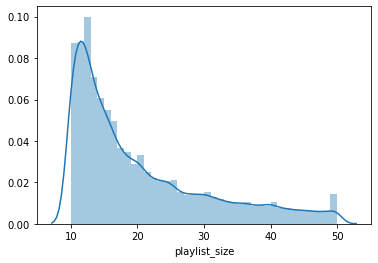

In [21]:
sns.distplot(user_df[['user_playlistname','playlist_size']].drop_duplicates().dropna()['playlist_size'],bins=range(10,51))

In [22]:
# user_df.iloc[0].search_string = 'Noah And The Whale 5 Years Time'
sp.search(user_df.iloc[0].search_string)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=Noah+And+The+Whale+5+Years+Time&type=track&offset=0&limit=10',
  'items': [{'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0aeLcja6hKzb7Uz2ou7ulP'},
       'href': 'https://api.spotify.com/v1/artists/0aeLcja6hKzb7Uz2ou7ulP',
       'id': '0aeLcja6hKzb7Uz2ou7ulP',
       'name': 'Noah And The Whale',
       'type': 'artist',
       'uri': 'spotify:artist:0aeLcja6hKzb7Uz2ou7ulP'}],
     'available_markets': ['CA', 'US'],
     'external_urls': {'spotify': 'https://open.spotify.com/album/4bzNinbJcnth182w03fSL2'},
     'href': 'https://api.spotify.com/v1/albums/4bzNinbJcnth182w03fSL2',
     'id': '4bzNinbJcnth182w03fSL2',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273b4355a108f55ebfd6a22ec54',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e02b4355a108f55ebfd6a22ec54',
       '

In [23]:
#example
r = sp.search(user_df.iloc[0].search_string)['tracks']['items'][0]['id']
print(r)

1KlDcHrlDPUJJPmMup3tUp


In [24]:
all_tracks = user_df[['search_string']].drop_duplicates().reset_index(drop=True)
all_tracks

,search_string
0,Noah And The Whale 5 Years Time
1,Noel Gallagher's High Flying Birds AKA... What...
2,Pearl Jam Alive
3,Tom Petty And The Heartbreakers American Girl
4,Bruce Springsteen Atlantic City
...,...
951158,Yoga Pop Ups The Edge Of Glory
951159,Yoga Pop Ups Till the World Ends
951160,Yoga Pop Ups Toxic
951161,Yoga Pop Ups Womanizer


In [31]:
# def get_tune(search_string):
#     attempts = 0
#     while attempts < 3:
#         try:
#             return sp.search(user_df.iloc[0].search_string,type='track',limit=1)['tracks']['items'][0]['id']
#         except:
#             time.sleep(1)
#             attempts += 1
#             continue
#         break
#     return ''
 
def get_tune(search_string):
    try:
        return sp.search(search_string,limit=1)['tracks']['items'][0]['id']
    except:
        return ''

In [ ]:
start = 0
res = []
for row,ss in tqdm(enumerate(all_tracks['search_string'][start:].to_list())):
    res.append(get_tune(ss))
    if row == 0:
        pass
    elif row == 10:
        all_tracks.loc[0:10,'track_id'] = res #only works if start = 0
        res.clear()
    elif row % 10 == 0:
        all_tracks.loc[(row+start-10+1):(row+start),'track_id'] = res
        res.clear()

41789it [1:36:38,  7.29it/s]

In [96]:
%%time

from concurrent.futures import as_completed, ProcessPoolExecutor
from multiprocessing import freeze_support
res = []

def get_tune_MT(key):
    global res
    try:
        tune = sp.search(key,limit=1)['tracks']['items'][0]['id']
        if tune:
#             print(tune)
#             search_strings[key] = tune
#             res.append(tune)
            return key + '---' + tune
    except:
        return key + '---'

keys = all_tracks['search_string'].to_list()
search_strings = {string : '' for string in keys}
print(len(search_strings))
for offset in range(10):
    with ProcessPoolExecutor(max_workers=4) as executor:
        futures = {executor.submit(get_tune_MT, key): key for key in tqdm(keys[offset * 1000: offset * 1000 + 1000])}

        for future in tqdm(as_completed(futures)):
            res.append(future.result())
    #         print(future.result())
    result = pd.DataFrame(res)
    res.clear()
    result.to_csv(f'track_id-{offset*1000}-{offset*1000 + 1000}.csv', index = False)




  0%|          | 0/1000 [00:00<?, ?it/s]

951163





  0%|          | 1/1000 [00:00<07:20,  2.27it/s]


 28%|██▊       | 275/1000 [00:00<03:43,  3.24it/s]


100%|██████████| 1000/1000 [00:00<00:00, 1300.76it/s]



0it [00:00, ?it/s]


1it [00:00,  9.54it/s]


2it [00:00,  9.38it/s]


3it [00:00,  9.27it/s]


5it [00:00, 10.06it/s]


9it [00:00, 12.91it/s]


13it [00:00, 16.13it/s]


17it [00:00, 19.48it/s]


21it [00:00, 22.93it/s]


25it [00:01, 26.27it/s]


29it [00:01, 28.54it/s]


33it [00:01, 29.94it/s]


37it [00:01, 31.55it/s]


41it [00:01, 32.71it/s]


45it [00:01, 33.74it/s]


49it [00:01, 34.00it/s]


53it [00:01, 34.38it/s]


57it [00:01, 35.71it/s]


62it [00:02, 37.20it/s]


66it [00:02, 36.72it/s]


70it [00:02, 36.34it/s]


74it [00:02, 35.94it/s]


78it [00:02, 36.04it/s]


82it [00:02, 35.58it/s]


86it [00:02, 36.29it/s]


90it [00:02, 36.67it/s]


94it [00:02, 35.92it/s]


98it [00:03, 34.40it/s]


102it [00:08,  2.39it/s]


106it [00:08,  3.30it/s]


110it [00:08,  4.54it/s]


114it [00:08,  6.17it/s]


118it [00:

CPU times: user 24 s, sys: 17.1 s, total: 41.1 s
Wall time: 16min 31s


In [95]:
result.to_csv(f'track_id-{offset*1000}-{offset*1000 + 1000}.csv')

In [91]:
len(res)

20

In [93]:
aa = list(set(res))
len(aa), aa

(20,
 ['Bruce Springsteen Atlantic City---1Vp8U39YNsDfd6yVuaUq12',
  'Miles Kane Inhaler---2sHFd48VMnInguyfh3K9jT',
  'Spector Chevy Thunder---6ikzdvfsPbdaGpXmeEeaK2',
  "Noel Gallagher's High Flying Birds Everybody's On the Run---7IEBI3QQTQ4U2nTBwQowd7",
  "Tom Petty Free Fallin'---5tVA6TkbaAH9QMITTQRrNv",
  'Noah And The Whale 5 Years Time---1KlDcHrlDPUJJPmMup3tUp',
  'Miles Kane Come Closer---20uVZbYFKshjrdDHcVy9w9',
  'Biffy Clyro God & Satan---6aihKTSpfxixl9uqm4hNEy',
  'Bruce Springsteen Death To My Hometown---5piFhn0sH6i5iGaESBuTJd',
  "Noel Gallagher's High Flying Birds AKA... What A Life!---5mljJfOTZR3nF4ExmRLTjv",
  'Elbow Grounds For Divorce---6gCeQ6xJs2tYdLRzCPxeTZ',
  'Madness Baggy Trousers---3Sbnhrpec0ULbeWBsA6GS6',
  'Pearl Jam Alive---1L94M3KIu7QluZe63g64rv',
  'Madness House Of Fun---4SactOQQV5J66VtQRVOBGC',
  'Tom Petty And The Heartbreakers American Girl---7MRyJPksH3G2cXHN8UKYzP',
  'Bruce Springsteen Born to Run---6hTcuIQa0sxrrByu9wTD7s',
  'Madness It Must Be Love

In [ ]:
all_tracks.head(20)

In [108]:
all_tracks.to_csv('all_tracks.csv', index = False)

In [ ]:
%%time
from pandarallel import pandarallel

pandarallel.initialize(progress_bar = True)

test_apply['track_id'] = test_apply['search_string'].parallel_apply(lambda x: get_tune(x))
test_apply

In [6]:
import pandas as pd
all_tracks = pd.read_csv('all_tracks.csv')

In [7]:
def get_tune(search_string):
    try:
        return sp.search(search_string,limit=1)['tracks']['items'][0]['id']
    except:
        return ''
    
    
def get_tune_MT(key):
    global res
    try:
        tune = sp.search(key,limit=1)['tracks']['items'][0]['id']
        if tune:
#             print(tune)
#             search_strings[key] = tune
#             res.append(tune)
            return key + '---' + tune
    except:
        return key + '---'

In [9]:
%%time
from pandarallel import pandarallel

pandarallel.initialize(progress_bar = True)

for offset in range(129, 200):
    print(offset)
    print(f'{offset*5000 + 5000}')
    test_apply = all_tracks[offset * 5000: offset * 5000 + 5000]
    
    test_apply['track_id'] = test_apply['search_string'].parallel_apply(lambda x: get_tune(x))
    test_apply.to_csv(f'track_id-{offset*5000}-{offset*5000 + 5000}.csv', index = False)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
128
645000


129
650000


Process ForkPoolWorker-51:
Process ForkPoolWorker-49:
Process ForkPoolWorker-50:
Process ForkPoolWorker-52:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  Fi

KeyboardInterrupt: 

KeyboardInterrupt
  File "/opt/conda/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
KeyboardInterrupt
